In [1]:
import h5py
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers import LSTM, CuDNNLSTM
from keras.optimizers import Adam
from keras.layers import Activation
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt




## Load Data from file

In [2]:
# def load_hdf_dataset(file_path, h5_key, input_key, output_key):
#     df = pd.read_hdf(file_path, h5_key)
#     x = np.array(df[[input_key]].to_numpy())
#     y = np.array(df[[output_key]].to_numpy())
#     x = np.array([np.array(row[0]) for row in x])
#     y = np.array([np.array(row[0]) for row in y])
#     return x, y
# h5_key = 'ib-samples'
# dataset_input_key = 'merged_input'
# dataset_output_key = 'merged_output'
# dataset_file_path = 'tmp/ib-out/ib-samples.h5'

def load_hdf_dataset(file_path, h5_key, input_key, output_key):
    #hf = h5py.File(file_path, 'r')
    dataset = np.load(file_path, allow_pickle=True)
    print(type(dataset))
    x = dataset[()][input_key]
    #x = np.array([np.array(row[0]) for row in x])

    y = dataset[()][output_key]
    #y = np.array([np.array(row[0]) for row in y])

    #hf.close()
    return x, y
h5_key = 'ib-samples'
dataset_input_key = 'merged_input'
dataset_output_key = 'merged_output'
dataset_file_path = 'tmp/ib-out/ib-samples.npy'

x, y = load_hdf_dataset(file_path=dataset_file_path, h5_key=h5_key, input_key=dataset_input_key, output_key= dataset_output_key)


<class 'numpy.ndarray'>


In [3]:
from sys import getsizeof

x.nbytes

2093040000

## Create Dataset

In [4]:

timesteps, data_dim = np.shape(x[0])

In [5]:


def create_model():

    dynamic_model_input_layer = Input(shape=(timesteps, data_dim))
    dynamic_model_lstm_layer = LSTM(32,return_state=False,return_sequences=True, activation="sigmoid", dropout=0.3)(dynamic_model_input_layer)
    dynamic_model_dense_layer = Dense(y.shape[2],activation="relu")(dynamic_model_lstm_layer)
    model = Model(inputs=dynamic_model_input_layer, outputs=dynamic_model_dense_layer)
    model.compile(loss=['mean_squared_error'] , optimizer=Adam(0.001))
    #model.build()
    model.summary()
    return model
model = create_model()

2022-08-09 16:45:09.974528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:45:10.022454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:45:10.022653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:45:10.023954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 9)]           0         
                                                                 
 lstm (LSTM)                 (None, 30, 32)            5376      
                                                                 
 dense (Dense)               (None, 30, 6)             198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [6]:
def scheduler(epoch, lr):
  if epoch == 200:
    return lr*0.1
  else:
      return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(x, y, epochs=1000, batch_size=4096, validation_split=0.3, callbacks=[lr_callback])


2022-08-09 16:45:16.911861: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 732564000 exceeds 10% of free system memory.
2022-08-09 16:45:17.310168: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 732564000 exceeds 10% of free system memory.


Epoch 1/1000
  5/166 [..............................] - ETA: 4s - loss: 13297.7402

2022-08-09 16:45:19.232298: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


165/166 [============================>.] - ETA: 0s - loss: 12688.5664

2022-08-09 16:45:23.377698: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 313956000 exceeds 10% of free system memory.
2022-08-09 16:45:23.542277: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 313956000 exceeds 10% of free system memory.


166/166 [==============================] - 7s 31ms/step - loss: 12685.9971 - val_loss: 12731.7480 - lr: 0.0010
Epoch 2/1000
166/166 [==============================] - 5s 27ms/step - loss: 11876.6807 - val_loss: 11973.3027 - lr: 0.0010
Epoch 3/1000
166/166 [==============================] - 5s 28ms/step - loss: 11195.7109 - val_loss: 11375.5605 - lr: 0.0010
Epoch 4/1000
166/166 [==============================] - 5s 27ms/step - loss: 10665.1699 - val_loss: 10876.8652 - lr: 0.0010
Epoch 5/1000
166/166 [==============================] - 5s 27ms/step - loss: 10205.1299 - val_loss: 10434.9297 - lr: 0.0010
Epoch 6/1000
166/166 [==============================] - 5s 27ms/step - loss: 9794.8799 - val_loss: 10037.5352 - lr: 0.0010
Epoch 7/1000
166/166 [==============================] - 4s 27ms/step - loss: 9423.8633 - val_loss: 9656.3076 - lr: 0.0010
Epoch 8/1000
166/166 [==============================] - 5s 27ms/step - loss: 9045.9717 - val_loss: 9288.8672 - lr: 0.0010
Epoch 9/1000
166/166 [====

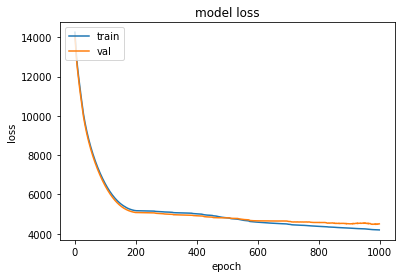

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
model_path = 'dynamic_model/model.h5'
model.save(model_path)

In [14]:
del model

In [15]:
model = keras.models.load_model(model_path)

In [16]:
x[0].shape

(50, 9)

In [17]:
model_out = model.predict(np.array( [x[0],]))

1/1 [==============================] - 0s 133ms/step


In [18]:
model_out

array([[[ 59.556736,  45.9887  ,  45.952644,  41.408707,  30.613796,
         187.69664 ],
        [ 66.90298 ,  48.37886 ,  47.142582,  46.704887,  35.212883,
         205.06093 ],
        [ 68.07765 ,  47.74941 ,  45.17911 ,  47.304714,  36.51204 ,
         205.03647 ],
        [ 68.01684 ,  47.343887,  44.62164 ,  47.205624,  36.53473 ,
         205.23775 ],
        [ 68.080124,  47.264847,  44.491756,  47.216537,  36.588535,
         205.53206 ],
        [ 67.85164 ,  46.880005,  43.94869 ,  47.038513,  36.54833 ,
         204.3767  ],
        [ 67.89721 ,  46.967503,  44.109955,  47.049393,  36.539173,
         204.82027 ],
        [ 68.17695 ,  47.09811 ,  44.187977,  47.234234,  36.730316,
         205.23563 ],
        [ 67.898705,  46.93158 ,  44.085644,  46.971485,  36.53098 ,
         205.09624 ],
        [ 68.297035,  47.39185 ,  44.764038,  47.23934 ,  36.637833,
         206.9762  ],
        [ 68.58186 ,  47.428234,  44.57995 ,  47.40869 ,  36.9167  ,
         206.78642 ],

In [19]:
y[0]

array([[ 70.        ,  53.13349533,  47.59637451,  25.29466057,
         21.47506332, 155.36943054]])